##Loading data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

file_path = '/content/death .csv'
data = pd.read_csv(file_path)
data_shape = data.shape
print("Dataset shape:", data_shape)

Dataset shape: (3141, 11)


In [ ]:
print(data.describe())

               FIPS  Met Objective of 45.5? (1)
count   3141.000000                 3141.000000
mean   30392.281757                    1.159185
std    15158.200839                    0.585495
min        0.000000                    0.000000
25%    18179.000000                    1.000000
50%    29177.000000                    1.000000
75%    45081.000000                    2.000000
max    56045.000000                    2.000000


In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 FIPS                                            0
Met Objective of 45.5? (1)                      0
County_Abbeville County, South Carolina         0
County_Acadia Parish, Louisiana                 0
County_Accomack County, Virginia                0
                                               ..
Upper 95% Confidence Interval for Trend_7.2     0
Upper 95% Confidence Interval for Trend_7.3     0
Upper 95% Confidence Interval for Trend_78.1    0
Upper 95% Confidence Interval for Trend_8.6     0
Upper 95% Confidence Interval for Trend_9.8     0
Length: 5845, dtype: int64


###Preprocessing

In [ ]:
data = data.dropna(subset=["Met Objective of 45.5? (1)"]).reset_index(drop=True)
label_encoder = LabelEncoder()
data['Met Objective of 45.5? (1)'] = label_encoder.fit_transform(data['Met Objective of 45.5? (1)'])

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = data[column].fillna(data[column].median())
data = pd.get_dummies(data)

###EDA

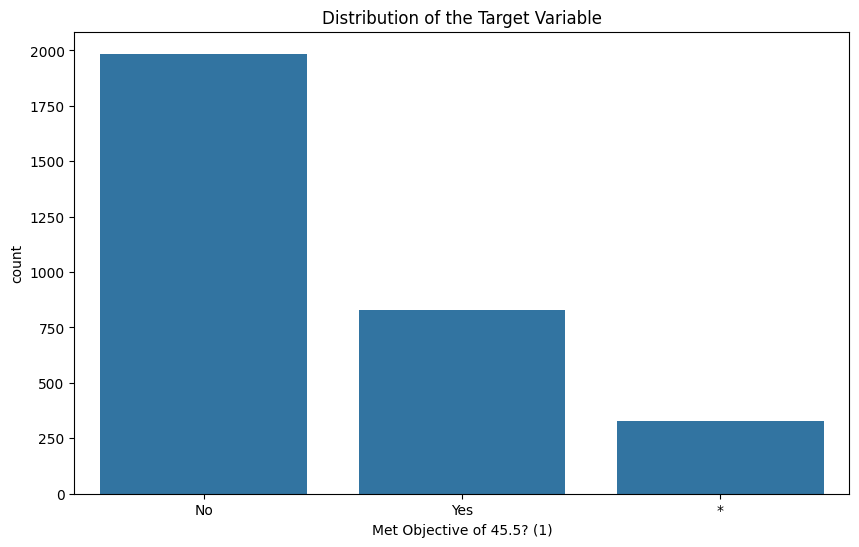

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Met Objective of 45.5? (1)', data=data)
plt.title('Distribution of the Target Variable')
plt.show()

###Target and feature variable

In [ ]:
X = data.drop(columns=['Met Objective of 45.5? (1)'])
y = data['Met Objective of 45.5? (1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Training and Testing(Pipeline)

In [ ]:
pipeline = Pipeline([

    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

In [ ]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

###Model Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.834658187599364
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       0.80      0.99      0.89       407
           2       0.91      0.38      0.53       157

    accuracy                           0.83       629
   macro avg       0.90      0.79      0.81       629
weighted avg       0.85      0.83      0.81       629

